In [1]:
import pickle
import gzip
import numpy as np
import scipy
import pandas as pd
import tensorflow as tf
import keras
import keras.layers as layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers import Input, LSTM, Dense, Lambda, Conv1D, Conv2D, AveragePooling2D, AveragePooling1D, Flatten, MaxPooling2D, MaxPooling1D, Dropout
from keras.models import Model
from keras.models import Sequential
from keras.utils import Sequence
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.optimizers import RMSprop
from keras.applications import imagenet_utils
from keras import backend as K
from time import time
from keras import losses
from sklearn.metrics import  roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score, mean_absolute_error
import glob
from PIL import Image
import h5py
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.gaussian_process as gp
import pandas as pd
import pickle
from joblib import dump, load


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Tue Dec 29 03:18:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    !rm -R qmc qmc1
    !git clone https://github.com/fagonzalezo/qmc.git
    !mv qmc qmc1
    !mv qmc1/qmc .
else:
    import sys
    sys.path.insert(0, "../")

rm: cannot remove 'qmc': No such file or directory
rm: cannot remove 'qmc1': No such file or directory
Cloning into 'qmc'...
remote: Enumerating objects: 215, done.
remote: Total 215 (delta 0), reused 0 (delta 0), pack-reused 215
Receiving objects: 100% (215/215), 17.06 MiB | 26.19 MiB/s, done.
Resolving deltas: 100% (91/91), done.


In [5]:
import qmc.tf.layers as layers
import qmc.tf.models as models

/usr/local/lib/python3.6/dist-packages/typeguard/__init__.py:804: UserWarning: no type annotations present -- not typechecking qmc.tf.layers.CrossProduct.__init__
  warn('no type annotations present -- not typechecking {}'.format(function_name(func)))
/usr/local/lib/python3.6/dist-packages/typeguard/__init__.py:804: UserWarning: no type annotations present -- not typechecking qmc.tf.layers.DensityMatrix2Dist.__init__
  warn('no type annotations present -- not typechecking {}'.format(function_name(func)))
/usr/local/lib/python3.6/dist-packages/typeguard/__init__.py:804: UserWarning: no type annotations present -- not typechecking qmc.tf.layers.DensityMatrixRegression.__init__
  warn('no type annotations present -- not typechecking {}'.format(function_name(func)))


In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [7]:
from sklearn.utils import shuffle

In [8]:
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/ICML2021/wisconsin/data/wpbc_all', header = None, sep = ' ')
#X = np.loadtxt('/content/drive/My Drive/Colab_Notebooks/qmr_losses_experiments/wisconsin.data')


In [9]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,1.0,16.13,20.68,108.10,798.8,0.11700,0.2022,0.17220,0.10280,0.2164,0.07356,0.5692,1.0730,3.854,54.18,0.00703,0.02501,0.03188,0.01297,0.01689,0.00414,20.96,31.48,136.8,1315.0,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420,3.0,1
1,0.0,15.34,14.26,102.50,704.4,0.10730,0.2135,0.20770,0.09756,0.2521,0.07032,0.4388,0.7096,3.384,44.91,0.00679,0.05328,0.06446,0.02252,0.03672,0.00439,18.07,19.08,125.1,980.9,0.1390,0.5954,0.6305,0.2393,0.4667,0.09946,1.3,1
2,1.0,21.16,23.04,137.20,1404.0,0.09428,0.1022,0.10970,0.08632,0.1769,0.05278,0.6917,1.1270,4.303,93.99,0.00473,0.01259,0.01715,0.01038,0.01083,0.00199,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526,4.0,1
3,0.0,19.07,24.81,128.30,1104.0,0.09081,0.2190,0.21070,0.09961,0.2310,0.06343,0.9811,1.6660,8.830,104.90,0.00655,0.10060,0.09723,0.02638,0.05333,0.00765,24.09,33.17,177.4,1651.0,0.1247,0.7444,0.7242,0.2493,0.4670,0.10380,2.3,1
4,0.0,18.65,17.60,123.70,1076.0,0.10990,0.1686,0.19740,0.10090,0.1907,0.06049,0.6289,0.6633,4.293,71.56,0.00629,0.03994,0.05554,0.01695,0.02428,0.00353,22.82,21.32,150.6,1567.0,0.1679,0.5090,0.7345,0.2378,0.3799,0.09185,1.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.0,15.78,17.89,103.60,781.0,0.09710,0.1292,0.09954,0.06606,0.1842,0.06082,0.5058,0.9849,3.564,54.16,0.00577,0.04061,0.02791,0.01282,0.02008,0.00414,20.42,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.1810,0.3792,0.10480,1.4,5
190,0.0,14.68,20.13,94.74,684.5,0.09867,0.0720,0.07395,0.05259,0.1586,0.05922,0.4727,1.2400,3.195,45.40,0.00572,0.01162,0.01998,0.01109,0.01410,0.00209,19.07,30.88,123.4,1138.0,0.1464,0.1871,0.2914,0.1609,0.3029,0.08216,1.1,5
191,2.0,11.84,18.70,77.93,440.6,0.11090,0.1516,0.12180,0.05182,0.2301,0.07799,0.4825,1.0300,3.475,41.00,0.00555,0.03414,0.04205,0.01044,0.02273,0.00567,16.82,28.12,119.4,888.7,0.1637,0.5775,0.6956,0.1546,0.4761,0.14020,3.0,5
192,0.0,13.11,15.56,87.21,530.2,0.13980,0.1765,0.20710,0.09601,0.1925,0.07692,0.3908,0.9238,2.410,34.66,0.00716,0.02912,0.05473,0.01388,0.01547,0.00710,16.31,22.40,106.4,827.2,0.1862,0.4099,0.6376,0.1986,0.3147,0.14050,1.5,5


In [10]:
X = data.to_numpy()

In [11]:
X.shape

(194, 33)

In [12]:
y = X[:,-1]
X = X[:,0:-1]

In [13]:
X.shape

(194, 32)

In [20]:
print(max(y))
print(min(y))

[1.]
[0.]


In [15]:
y = (y-1)/4

In [17]:
y = np.float64(y)

In [18]:
y = y.reshape((194,1))

In [19]:
X = np.float64(X)

In [ ]:
from sklearn import preprocessing
X = preprocessing.scale(X)

In [ ]:
from scipy.spatial import distance

distances = distance.cdist(X, X, 'euclidean')

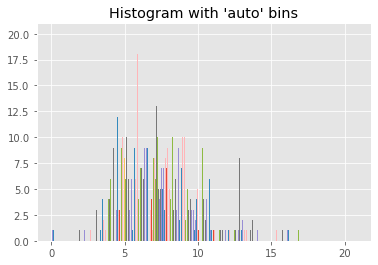

In [ ]:
import matplotlib.pyplot as plt

_ = plt.hist(distances, bins='auto')  # arguments are passed to np.histogram

plt.title("Histogram with 'auto' bins")

plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
for i in range(24):

    beta = 1 + np.random.sample()*19.9
    gamma = np.random.sample()*0.1
    learning_rate = 0.000000099 + np.random.sample()*0.0009999
    alpha = np.random.sample()
    dim_x = np.random.choice([1024, 512, 256])
    dim_x = int(dim_x)
    num_eig = np.random.choice([int(dim_x/8), int(dim_x/16), int(dim_x/32)])
    num_eig = int(num_eig)
    print('------------', i+1, 'beta=', beta, 'gamma=', gamma, 'learning_rate=', learning_rate, 'alpha=', alpha, 'dim_x=', dim_x, 'num_eig=', num_eig)

    MAE = []

    dim_y = 5
    fm_y = layers.QFeatureMapSmp(dim=dim_y, beta=beta)
    fm_x = layers.QFeatureMapRFF(32, dim=dim_x, gamma=gamma, random_state=1)
    qmr2 = models.QMRegressorSGD(input_dim=32, dim_x=dim_x, num_eig=num_eig, dim_y=dim_y, gamma=gamma, random_state=17)

    # for initialize weights

    qmr = models.QMRegressor(fm_x=fm_x, fm_y=fm_y, dim_x=dim_x, dim_y=dim_y)
    qmr.compile()
    qmr.fit(X_train, y_train, epochs=1, batch_size = 4)

    for i in range(5): 
        X_train, y_train = shuffle(X_train, y_train)
        qmr2.set_rho(qmr.get_rho())
        # Train model with SGD
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        qmr2.layers[0].trainable = True

        def loss(y_true, y_pred):
            return tf.keras.losses.mean_squared_error(y_true, y_pred[:,0:1]) + alpha * y_pred[:, 1:2]

        qmr2.compile(optimizer, loss=loss)
        qmr2.set_rho(qmr.get_rho())
        early_stop = EarlyStopping( monitor="val_loss",
                                    min_delta=0,
                                    patience=5,
                                    verbose=1,
                                    mode="auto",
                                    restore_best_weights=True,
                                    )

        qmr2.fit(X_train, y_train, epochs=60, validation_split = 0.2, batch_size = 4, callbacks = early_stop, verbose = 0)

        out = qmr2.predict(X_test, batch_size = 4)
        y_pred, std = out[:, 0], np.sqrt(out[:, 1])

        MAE.append(mean_absolute_error(np.rint(y_test*4)+1, np.rint(y_pred*4)+1))

    print('---------------------mean MAE =', np.mean(MAE), ' , std =', np.std(MAE))

------------ 1 beta= 3.485283112544436 gamma= 0.04263201501489349 learning_rate= 0.0004012384669550905 alpha= 0.5836978880442146 dim_x= 1024 num_eig= 128
34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00024: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00020: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00015: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00027: early stopping
---------------------mean MAE = 1.1593220338983052  , std = 0.02299094909533983
------------ 2 beta= 14.063243796091513 gamma= 0.03335736290706165 learning_rate= 0.0006208949699917043 alpha= 0.37283404818847543 dim_x= 256 num_eig= 8
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00011: early stopping
Res

# Ahora los experimentos finales, con los mejores parametros para MSE

In [ ]:
beta= 11.168578686120808 
gamma= 0.019782636050873624 
learning_rate= 0.0008736519215542466 
alpha= 0.383147331982576 
dim_x= 512 
num_eig= 32

#beta= 14.937963660171226 
#gamma= 0.02192016019576171 
#learning_rate= 0.0003769575135508885 
#alpha= 0.45844374183474923 
#dim_x= 256 
#num_eig= 32

dim_y = 5
MAE = []
for i in range(20): 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    fm_y = layers.QFeatureMapSmp(dim=dim_y, beta=beta)
    fm_x = layers.QFeatureMapRFF(32, dim=dim_x, gamma=gamma, random_state=1)
    qmr2 = models.QMRegressorSGD(input_dim=32, dim_x=dim_x, num_eig=num_eig, dim_y=dim_y, gamma=gamma, random_state=17)

    # for initialize weights

    qmr = models.QMRegressor(fm_x=fm_x, fm_y=fm_y, dim_x=dim_x, dim_y=dim_y)
    qmr.compile()
    qmr.fit(X_train, y_train, epochs=1, batch_size = 4)

    qmr2.set_rho(qmr.get_rho())
    # Train model with SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    qmr2.layers[0].trainable = True

    def loss(y_true, y_pred):
        return tf.keras.losses.mean_squared_error(y_true, y_pred[:,0:1]) + alpha * y_pred[:, 1:2]

    qmr2.compile(optimizer, loss=loss)
    qmr2.set_rho(qmr.get_rho())
    early_stop = EarlyStopping( monitor="val_loss",
                                min_delta=0,
                                patience=5,
                                verbose=1,
                                mode="auto",
                                restore_best_weights=True,
                                )

    qmr2.fit(X_train, y_train, epochs=60, validation_split = 0.2, batch_size = 4, callbacks = early_stop, verbose = 0)

    out = qmr2.predict(X_test, batch_size = 4)
    y_pred, std = out[:, 0], np.sqrt(out[:, 1])

    MAE.append(mean_absolute_error(np.rint(y_test*4), np.rint(y_pred*4)))

print('---------------------mean MAE =', np.mean(MAE), ' , std =', np.std(MAE))

34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00007: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00008: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00009: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00007: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00007: early stopping
34/34 [==============================] - 

In [ ]:
beta= 11.168578686120808 
gamma= 0.019782636050873624 
learning_rate= 0.0008736519215542466 
alpha= 0.383147331982576 
dim_x= 512 
num_eig= 32

#beta= 14.937963660171226 
#gamma= 0.02192016019576171 
#learning_rate= 0.0003769575135508885 
#alpha= 0.45844374183474923 
#dim_x= 256 
#num_eig= 32
dim_y = 5
MAE = []
for i in range(20): 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31)

    fm_y = layers.QFeatureMapSmp(dim=dim_y, beta=beta)
    fm_x = layers.QFeatureMapRFF(32, dim=dim_x, gamma=gamma, random_state=1)
    qmr2 = models.QMRegressorSGD(input_dim=32, dim_x=dim_x, num_eig=num_eig, dim_y=dim_y, gamma=gamma, random_state=17)

    # for initialize weights

    qmr = models.QMRegressor(fm_x=fm_x, fm_y=fm_y, dim_x=dim_x, dim_y=dim_y)
    qmr.compile()
    qmr.fit(X_train, y_train, epochs=1, batch_size = 4)

    qmr2.set_rho(qmr.get_rho())
    # Train model with SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    qmr2.layers[0].trainable = True

    def loss(y_true, y_pred):
        return tf.keras.losses.MAE(y_true, y_pred[:,0:1]) + alpha * tf.math.sqrt(y_pred[:, 1:2])

    qmr2.compile(optimizer, loss=loss)
    qmr2.set_rho(qmr.get_rho())
    early_stop = EarlyStopping( monitor="val_loss",
                                min_delta=0,
                                patience=5,
                                verbose=1,
                                mode="auto",
                                restore_best_weights=True,
                                )

    qmr2.fit(X_train, y_train, epochs=60, validation_split = 0.2, batch_size = 4, callbacks = early_stop, verbose = 0)

    out = qmr2.predict(X_test, batch_size = 4)
    y_pred, std = out[:, 0], np.sqrt(out[:, 1])

    MAE.append(mean_absolute_error(np.rint(y_test*4), np.rint(y_pred*4)))

print('---------------------mean MAE =', np.mean(MAE), ' , std =', np.std(MAE))

34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00008: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00010: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00008: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00011: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00011: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00015: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00008: early stopping
34/34 [==============================] - 

In [ ]:
beta= 11.168578686120808 
gamma= 0.019782636050873624 
learning_rate= 0.0008736519215542466 
alpha= 0.383147331982576 
dim_x= 512 
num_eig= 32

#beta= 14.937963660171226 
#gamma= 0.02192016019576171 
#learning_rate= 0.0003769575135508885 
#alpha= 0.45844374183474923 
#dim_x= 256 
#num_eig= 32
dim_y = 5
MAE = []
for i in range(20): 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31)

    fm_y = layers.QFeatureMapSmp(dim=dim_y, beta=beta)
    fm_x = layers.QFeatureMapRFF(32, dim=dim_x, gamma=gamma, random_state=1)
    qmr2 = models.QMRegressorSGD(input_dim=32, dim_x=dim_x, num_eig=num_eig, dim_y=dim_y, gamma=gamma, random_state=17)

    # for initialize weights

    qmr = models.QMRegressor(fm_x=fm_x, fm_y=fm_y, dim_x=dim_x, dim_y=dim_y)
    qmr.compile()
    qmr.fit(X_train, y_train, epochs=1, batch_size = 4)

    qmr2.set_rho(qmr.get_rho())
    # Train model with SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    qmr2.layers[0].trainable = True

    def loss(y_true, y_pred):
        h = tf.keras.losses.Huber()
        return h(y_true, y_pred[:,0:1]) + alpha * tf.math.sqrt(y_pred[:, 1:2])

    qmr2.compile(optimizer, loss=loss)
    qmr2.set_rho(qmr.get_rho())
    early_stop = EarlyStopping( monitor="val_loss",
                                min_delta=0,
                                patience=5,
                                verbose=1,
                                mode="auto",
                                restore_best_weights=True,
                                )

    qmr2.fit(X_train, y_train, epochs=60, validation_split = 0.2, batch_size = 4, callbacks = early_stop, verbose = 0)

    out = qmr2.predict(X_test, batch_size = 4)
    y_pred, std = out[:, 0], np.sqrt(out[:, 1])

    MAE.append(mean_absolute_error(np.rint(y_test*4), np.rint(y_pred*4)))

print('---------------------mean MAE =', np.mean(MAE), ' , std =', np.std(MAE))

34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00034: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00046: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00042: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00015: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00033: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00047: early stopping
34/34 [==============================] - 

# Ahora los experimentos finales, con los mejores parametros para MAE

In [ ]:
beta= 17.81915647088741 
gamma= 0.019782636050873624 
learning_rate= 6.701501049808681e-05 
alpha= 0.48092427920298797 
dim_x= 512 
num_eig= 32

#beta= 4.526095308003731 
#gamma= 0.026826101784219892 
#learning_rate= 0.0006221125931396382 
#alpha= 0.9805380719114533 
#dim_x= 1024 
#num_eig= 64

dim_y = 5
MAE = []
for i in range(20): 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    fm_y = layers.QFeatureMapSmp(dim=dim_y, beta=beta)
    fm_x = layers.QFeatureMapRFF(32, dim=dim_x, gamma=gamma, random_state=1)
    qmr2 = models.QMRegressorSGD(input_dim=32, dim_x=dim_x, num_eig=num_eig, dim_y=dim_y, gamma=gamma, random_state=17)

    # for initialize weights

    qmr = models.QMRegressor(fm_x=fm_x, fm_y=fm_y, dim_x=dim_x, dim_y=dim_y)
    qmr.compile()
    qmr.fit(X_train, y_train, epochs=1, batch_size = 4)

    qmr2.set_rho(qmr.get_rho())
    # Train model with SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    qmr2.layers[0].trainable = True

    def loss(y_true, y_pred):
        return tf.keras.losses.mean_squared_error(y_true, y_pred[:,0:1]) + alpha * y_pred[:, 1:2]

    qmr2.compile(optimizer, loss=loss)
    qmr2.set_rho(qmr.get_rho())
    early_stop = EarlyStopping( monitor="val_loss",
                                min_delta=0,
                                patience=5,
                                verbose=1,
                                mode="auto",
                                restore_best_weights=True,
                                )

    qmr2.fit(X_train, y_train, epochs=60, validation_split = 0.2, batch_size = 4, callbacks = early_stop, verbose = 0)

    out = qmr2.predict(X_test, batch_size = 4)
    y_pred, std = out[:, 0], np.sqrt(out[:, 1])

    MAE.append(mean_absolute_error(np.rint(y_test*4), np.rint(y_pred*4)))

print('---------------------mean MAE =', np.mean(MAE), ' , std =', np.std(MAE))

34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00013: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00017: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00017: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00014: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00011: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00014: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00016: early stopping
34/34 [==============================] - 

In [ ]:
beta= 4.526095308003731 
gamma= 0.026826101784219892 
learning_rate= 0.0006221125931396382 
alpha= 0.9805380719114533 
dim_x= 1024 
num_eig= 64

dim_y = 5
MAE = []
for i in range(20): 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    fm_y = layers.QFeatureMapSmp(dim=dim_y, beta=beta)
    fm_x = layers.QFeatureMapRFF(32, dim=dim_x, gamma=gamma, random_state=1)
    qmr2 = models.QMRegressorSGD(input_dim=32, dim_x=dim_x, num_eig=num_eig, dim_y=dim_y, gamma=gamma, random_state=17)

    # for initialize weights

    qmr = models.QMRegressor(fm_x=fm_x, fm_y=fm_y, dim_x=dim_x, dim_y=dim_y)
    qmr.compile()
    qmr.fit(X_train, y_train, epochs=1, batch_size = 4)

    qmr2.set_rho(qmr.get_rho())
    # Train model with SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    qmr2.layers[0].trainable = True

    def loss(y_true, y_pred):
        return tf.keras.losses.mean_squared_error(y_true, y_pred[:,0:1]) + alpha * y_pred[:, 1:2]

    qmr2.compile(optimizer, loss=loss)
    qmr2.set_rho(qmr.get_rho())
    early_stop = EarlyStopping( monitor="val_loss",
                                min_delta=0,
                                patience=5,
                                verbose=1,
                                mode="auto",
                                restore_best_weights=True,
                                )

    qmr2.fit(X_train, y_train, epochs=60, validation_split = 0.2, batch_size = 4, callbacks = early_stop, verbose = 0)

    out = qmr2.predict(X_test, batch_size = 4)
    y_pred, std = out[:, 0], np.sqrt(out[:, 1])

    MAE.append(mean_absolute_error(np.rint(y_test*4), np.rint(y_pred*4)))

print('---------------------mean MAE =', np.mean(MAE), ' , std =', np.std(MAE))

34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00009: early stopping
34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00010: early stopping
34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00008: early stopping
34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00010: early stopping
34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00010: early stopping
34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00009: early stopping
34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00009: early stopping
34/34 [==============================] - 

In [ ]:
beta= 17.81915647088741 
gamma= 0.019782636050873624 
learning_rate= 6.701501049808681e-05 
alpha= 0.48092427920298797 
dim_x= 512 
num_eig= 32

#beta= 4.526095308003731 
#gamma= 0.026826101784219892 
#learning_rate= 0.0006221125931396382 
#alpha= 0.9805380719114533 
#dim_x= 1024 
#num_eig= 64

dim_y = 5
MAE = []
for i in range(20): 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31)

    fm_y = layers.QFeatureMapSmp(dim=dim_y, beta=beta)
    fm_x = layers.QFeatureMapRFF(32, dim=dim_x, gamma=gamma, random_state=1)
    qmr2 = models.QMRegressorSGD(input_dim=32, dim_x=dim_x, num_eig=num_eig, dim_y=dim_y, gamma=gamma, random_state=17)

    # for initialize weights

    qmr = models.QMRegressor(fm_x=fm_x, fm_y=fm_y, dim_x=dim_x, dim_y=dim_y)
    qmr.compile()
    qmr.fit(X_train, y_train, epochs=1, batch_size = 4)

    qmr2.set_rho(qmr.get_rho())
    # Train model with SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    qmr2.layers[0].trainable = True

    def loss(y_true, y_pred):
        return tf.keras.losses.MAE(y_true, y_pred[:,0:1]) + alpha * tf.math.sqrt(y_pred[:, 1:2])

    qmr2.compile(optimizer, loss=loss)
    qmr2.set_rho(qmr.get_rho())
    early_stop = EarlyStopping( monitor="val_loss",
                                min_delta=0,
                                patience=5,
                                verbose=1,
                                mode="auto",
                                restore_best_weights=True,
                                )

    qmr2.fit(X_train, y_train, epochs=60, validation_split = 0.2, batch_size = 4, callbacks = early_stop, verbose = 0)

    out = qmr2.predict(X_test, batch_size = 4)
    y_pred, std = out[:, 0], np.sqrt(out[:, 1])

    MAE.append(mean_absolute_error(np.rint(y_test*4), np.rint(y_pred*4)))

print('---------------------mean MAE =', np.mean(MAE), ' , std =', np.std(MAE))

34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00026: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00030: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00027: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00028: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00047: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00046: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00047: early stopping
34/34 [==============================] - 

In [ ]:
beta= 4.526095308003731 
gamma= 0.026826101784219892 
learning_rate= 0.0006221125931396382 
alpha= 0.9805380719114533 
dim_x= 1024 
num_eig= 64

dim_y = 5
MAE = []
for i in range(20): 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31)

    fm_y = layers.QFeatureMapSmp(dim=dim_y, beta=beta)
    fm_x = layers.QFeatureMapRFF(32, dim=dim_x, gamma=gamma, random_state=1)
    qmr2 = models.QMRegressorSGD(input_dim=32, dim_x=dim_x, num_eig=num_eig, dim_y=dim_y, gamma=gamma, random_state=17)

    # for initialize weights

    qmr = models.QMRegressor(fm_x=fm_x, fm_y=fm_y, dim_x=dim_x, dim_y=dim_y)
    qmr.compile()
    qmr.fit(X_train, y_train, epochs=1, batch_size = 4)

    qmr2.set_rho(qmr.get_rho())
    # Train model with SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    qmr2.layers[0].trainable = True

    def loss(y_true, y_pred):
        return tf.keras.losses.MAE(y_true, y_pred[:,0:1]) + alpha * tf.math.sqrt(y_pred[:, 1:2])

    qmr2.compile(optimizer, loss=loss)
    qmr2.set_rho(qmr.get_rho())
    early_stop = EarlyStopping( monitor="val_loss",
                                min_delta=0,
                                patience=5,
                                verbose=1,
                                mode="auto",
                                restore_best_weights=True,
                                )

    qmr2.fit(X_train, y_train, epochs=60, validation_split = 0.2, batch_size = 4, callbacks = early_stop, verbose = 0)

    out = qmr2.predict(X_test, batch_size = 4)
    y_pred, std = out[:, 0], np.sqrt(out[:, 1])

    MAE.append(mean_absolute_error(np.rint(y_test*4), np.rint(y_pred*4)))

print('---------------------mean MAE =', np.mean(MAE), ' , std =', np.std(MAE))

34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00048: early stopping
34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00019: early stopping
34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00007: early stopping
34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00044: early stopping
34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00037: early stopping
34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00035: early stopping
34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
34/34 [==============================] - 

In [ ]:
beta= 17.81915647088741 
gamma= 0.019782636050873624 
learning_rate= 6.701501049808681e-05 
alpha= 0.48092427920298797 
dim_x= 512 
num_eig= 32

#beta= 4.526095308003731 
#gamma= 0.026826101784219892 
#learning_rate= 0.0006221125931396382 
#alpha= 0.9805380719114533 
#dim_x= 1024 
#num_eig= 64

dim_y = 5
MAE = []
for i in range(20): 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31)

    fm_y = layers.QFeatureMapSmp(dim=dim_y, beta=beta)
    fm_x = layers.QFeatureMapRFF(32, dim=dim_x, gamma=gamma, random_state=1)
    qmr2 = models.QMRegressorSGD(input_dim=32, dim_x=dim_x, num_eig=num_eig, dim_y=dim_y, gamma=gamma, random_state=17)

    # for initialize weights

    qmr = models.QMRegressor(fm_x=fm_x, fm_y=fm_y, dim_x=dim_x, dim_y=dim_y)
    qmr.compile()
    qmr.fit(X_train, y_train, epochs=1, batch_size = 4)

    qmr2.set_rho(qmr.get_rho())
    # Train model with SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    qmr2.layers[0].trainable = True

    def loss(y_true, y_pred):
        h = tf.keras.losses.Huber()
        return h(y_true, y_pred[:,0:1]) + alpha * tf.math.sqrt(y_pred[:, 1:2])

    qmr2.compile(optimizer, loss=loss)
    qmr2.set_rho(qmr.get_rho())
    early_stop = EarlyStopping( monitor="val_loss",
                                min_delta=0,
                                patience=5,
                                verbose=1,
                                mode="auto",
                                restore_best_weights=True,
                                )

    qmr2.fit(X_train, y_train, epochs=60, validation_split = 0.2, batch_size = 4, callbacks = early_stop, verbose = 0)

    out = qmr2.predict(X_test, batch_size = 4)
    y_pred, std = out[:, 0], np.sqrt(out[:, 1])

    MAE.append(mean_absolute_error(np.rint(y_test*4), np.rint(y_pred*4)))

print('---------------------mean MAE =', np.mean(MAE), ' , std =', np.std(MAE))

34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00053: early stopping
34/34 [==============================] - 0s 1ms/step
---------------------mean MAE = 0.9983606557377047  , std = 0.10275694389649064


In [ ]:
beta= 4.526095308003731 
gamma= 0.026826101784219892 
learning_rate= 0.0006221125931396382 
alpha= 0.9805380719114533 
dim_x= 1024 
num_eig= 64

dim_y = 5
MAE = []
for i in range(20): 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31)

    fm_y = layers.QFeatureMapSmp(dim=dim_y, beta=beta)
    fm_x = layers.QFeatureMapRFF(32, dim=dim_x, gamma=gamma, random_state=1)
    qmr2 = models.QMRegressorSGD(input_dim=32, dim_x=dim_x, num_eig=num_eig, dim_y=dim_y, gamma=gamma, random_state=17)

    # for initialize weights

    qmr = models.QMRegressor(fm_x=fm_x, fm_y=fm_y, dim_x=dim_x, dim_y=dim_y)
    qmr.compile()
    qmr.fit(X_train, y_train, epochs=1, batch_size = 4)

    qmr2.set_rho(qmr.get_rho())
    # Train model with SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    qmr2.layers[0].trainable = True

    def loss(y_true, y_pred):
        h = tf.keras.losses.Huber()
        return h(y_true, y_pred[:,0:1]) + alpha * tf.math.sqrt(y_pred[:, 1:2])

    qmr2.compile(optimizer, loss=loss)
    qmr2.set_rho(qmr.get_rho())
    early_stop = EarlyStopping( monitor="val_loss",
                                min_delta=0,
                                patience=5,
                                verbose=1,
                                mode="auto",
                                restore_best_weights=True,
                                )

    qmr2.fit(X_train, y_train, epochs=60, validation_split = 0.2, batch_size = 4, callbacks = early_stop, verbose = 0)

    out = qmr2.predict(X_test, batch_size = 4)
    y_pred, std = out[:, 0], np.sqrt(out[:, 1])

    MAE.append(mean_absolute_error(np.rint(y_test*4), np.rint(y_pred*4)))

print('---------------------mean MAE =', np.mean(MAE), ' , std =', np.std(MAE))

34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00052: early stopping
34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00051: early stopping
34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00030: early stopping
34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00042: early stopping
34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00055: early stopping
34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00036: early stopping
34/34 [==============================] - 0s 3ms/step
Restoring model weights from the end of the best epoch.
Epoch 00023: early stopping
34/34 [==============================] - 

# Ahora los experimentos finales, con los mejores parametros para HUBER

In [ ]:
beta= 7.902870743663927 
gamma= 0.019782636050873624 
learning_rate= 0.00017466660484643585 
alpha= 0.34917795264541507 
dim_x= 512 
num_eig= 64

#beta= 18.357737577708882 
#gamma= 0.09416500056019565 
#learning_rate= 0.00044636852080991385 
#alpha= 0.8888784573520224 
#dim_x= 512 
#num_eig= 32

dim_y = 5
MAE = []
for i in range(20): 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31)

    fm_y = layers.QFeatureMapSmp(dim=dim_y, beta=beta)
    fm_x = layers.QFeatureMapRFF(32, dim=dim_x, gamma=gamma, random_state=1)
    qmr2 = models.QMRegressorSGD(input_dim=32, dim_x=dim_x, num_eig=num_eig, dim_y=dim_y, gamma=gamma, random_state=17)

    # for initialize weights

    qmr = models.QMRegressor(fm_x=fm_x, fm_y=fm_y, dim_x=dim_x, dim_y=dim_y)
    qmr.compile()
    qmr.fit(X_train, y_train, epochs=1, batch_size = 4)

    qmr2.set_rho(qmr.get_rho())
    # Train model with SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    qmr2.layers[0].trainable = True

    def loss(y_true, y_pred):
        return tf.keras.losses.mean_squared_error(y_true, y_pred[:,0:1]) + alpha * y_pred[:, 1:2]

    qmr2.compile(optimizer, loss=loss)
    qmr2.set_rho(qmr.get_rho())
    early_stop = EarlyStopping( monitor="val_loss",
                                min_delta=0,
                                patience=5,
                                verbose=1,
                                mode="auto",
                                restore_best_weights=True,
                                )

    qmr2.fit(X_train, y_train, epochs=60, validation_split = 0.2, batch_size = 4, callbacks = early_stop, verbose = 0)

    out = qmr2.predict(X_test, batch_size = 4)
    y_pred, std = out[:, 0], np.sqrt(out[:, 1])

    MAE.append(mean_absolute_error(np.rint(y_test*4), np.rint(y_pred*4)))

print('---------------------mean MAE =', np.mean(MAE), ' , std =', np.std(MAE))

34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00009: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00007: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00008: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00009: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00010: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00007: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00010: early stopping
34/34 [==============================] - 

In [ ]:
beta= 7.902870743663927 
gamma= 0.019782636050873624 
learning_rate= 0.00017466660484643585 
alpha= 0.34917795264541507 
dim_x= 512 
num_eig= 64

#beta= 18.357737577708882 
#gamma= 0.09416500056019565 
#learning_rate= 0.00044636852080991385 
#alpha= 0.8888784573520224 
#dim_x= 512 
#num_eig= 32

dim_y = 5
MAE = []
for i in range(20): 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31)

    fm_y = layers.QFeatureMapSmp(dim=dim_y, beta=beta)
    fm_x = layers.QFeatureMapRFF(32, dim=dim_x, gamma=gamma, random_state=1)
    qmr2 = models.QMRegressorSGD(input_dim=32, dim_x=dim_x, num_eig=num_eig, dim_y=dim_y, gamma=gamma, random_state=17)

    # for initialize weights

    qmr = models.QMRegressor(fm_x=fm_x, fm_y=fm_y, dim_x=dim_x, dim_y=dim_y)
    qmr.compile()
    qmr.fit(X_train, y_train, epochs=1, batch_size = 4)

    qmr2.set_rho(qmr.get_rho())
    # Train model with SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    qmr2.layers[0].trainable = True

    def loss(y_true, y_pred):
        return tf.keras.losses.MAE(y_true, y_pred[:,0:1]) + alpha * tf.math.sqrt(y_pred[:, 1:2])

    qmr2.compile(optimizer, loss=loss)
    qmr2.set_rho(qmr.get_rho())
    early_stop = EarlyStopping( monitor="val_loss",
                                min_delta=0,
                                patience=5,
                                verbose=1,
                                mode="auto",
                                restore_best_weights=True,
                                )

    qmr2.fit(X_train, y_train, epochs=60, validation_split = 0.2, batch_size = 32, callbacks = early_stop, verbose = 0)

    out = qmr2.predict(X_test, batch_size = 32)
    y_pred, std = out[:, 0], np.sqrt(out[:, 1])

    MAE.append(mean_absolute_error(np.rint(y_test*4), np.rint(y_pred*4)))

print('---------------------mean MAE =', np.mean(MAE), ' , std =', np.std(MAE))

34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00016: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00017: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00026: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00017: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00016: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
34/34 [==============================] - 

In [ ]:
beta= 7.902870743663927 
gamma= 0.019782636050873624 
learning_rate= 0.00017466660484643585 
alpha= 0.34917795264541507 
dim_x= 512 
num_eig= 64

#beta= 18.357737577708882 
#gamma= 0.09416500056019565 
#learning_rate= 0.00044636852080991385 
#alpha= 0.8888784573520224 
#dim_x= 512 
#num_eig= 32

dim_y = 5
MAE = []
for i in range(20): 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31)

    fm_y = layers.QFeatureMapSmp(dim=dim_y, beta=beta)
    fm_x = layers.QFeatureMapRFF(32, dim=dim_x, gamma=gamma, random_state=1)
    qmr2 = models.QMRegressorSGD(input_dim=32, dim_x=dim_x, num_eig=num_eig, dim_y=dim_y, gamma=gamma, random_state=17)

    # for initialize weights

    qmr = models.QMRegressor(fm_x=fm_x, fm_y=fm_y, dim_x=dim_x, dim_y=dim_y)
    qmr.compile()
    qmr.fit(X_train, y_train, epochs=1, batch_size = 4)

    qmr2.set_rho(qmr.get_rho())
    # Train model with SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    qmr2.layers[0].trainable = True

    def loss(y_true, y_pred):
        h = tf.keras.losses.Huber()
        return h(y_true, y_pred[:,0:1]) + alpha * tf.math.sqrt(y_pred[:, 1:2])

    qmr2.compile(optimizer, loss=loss)
    qmr2.set_rho(qmr.get_rho())
    early_stop = EarlyStopping( monitor="val_loss",
                                min_delta=0,
                                patience=5,
                                verbose=1,
                                mode="auto",
                                restore_best_weights=True,
                                )

    qmr2.fit(X_train, y_train, epochs=60, validation_split = 0.2, batch_size = 32, callbacks = early_stop, verbose = 0)

    out = qmr2.predict(X_test, batch_size = 32)
    y_pred, std = out[:, 0], np.sqrt(out[:, 1])

    MAE.append(mean_absolute_error(np.rint(y_test*4), np.rint(y_pred*4)))

print('---------------------mean MAE =', np.mean(MAE), ' , std =', np.std(MAE))

34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00050: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00044: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00046: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00041: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00057: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00049: early stopping
34/34 [==============================] - 0s 1ms/step
Restoring model weights from the end of the best epoch.
Epoch 00038: early stopping
34/34 [==============================] - 